# Cat Project
Welcome to my own version 6of the cat classifier using tensorflow, keras and CNN!

The goal of the project is to make the CLASSIC cat vs non-cat image classification model using simple machine learning models. 


In [1]:
%pwd

'D:\\data_science\\cat project'

In [2]:
import os 

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir='datasets'
os.listdir(train_dir)

['CATS', 'NON-CATS']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip= True,vertical_flip=False,zoom_range=[0.2,1.1],
                            shear_range=0.05,width_shift_range=[0,0.15],rotation_range=50,
                             fill_mode='nearest', rescale=1/255, validation_split=0.2)

In [5]:
train_datagen=datagen.flow_from_directory(
          train_dir, 
          target_size=(100,100),
          color_mode='grayscale',
          batch_size=32,
          class_mode='binary',
          subset='training')

Found 23107 images belonging to 2 classes.


In [6]:
test_datagen=datagen.flow_from_directory(
          train_dir, 
          target_size=(100,100),
          color_mode='grayscale',
          batch_size=32,
          class_mode='binary',
          subset='validation',
          shuffle=False)

Found 5776 images belonging to 2 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop = EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=3,restore_best_weights=True)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4), activation='relu', padding='same', input_shape=(100, 100, 1)))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(filters=256,kernel_size=(4,4), activation='relu', padding='same'))
# model.add(BatchNormalization(axis = 3))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(filters=128,kernel_size=(4,4), activation='relu', padding='same'))
# model.add(BatchNormalization(axis = 3))
# model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=8,kernel_size=(4,4), activation='relu', padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=8,kernel_size=(4,4), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
from tensorflow.keras import metrics
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 64)      1088      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 8)         8200      
_________________________________________________________________
batch_normalization_3 (Batch (None, 50, 50, 8)         32        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 8)        

In [14]:
model.fit(
           train_datagen, 
           epochs=3,
           validation_data=test_datagen,
           callbacks=[Early_Stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 723 steps, validate for 181 steps
Epoch 1/3
723/723 [==============================] - 127s 175ms/step - loss: 0.6411 - accuracy: 0.6346 - val_loss: 0.6094 - val_accuracy: 0.6691
Epoch 2/3
723/723 [==============================] - 110s 152ms/step - loss: 0.6289 - accuracy: 0.6470 - val_loss: 0.7021 - val_accuracy: 0.6297
Epoch 3/3
723/723 [==============================] - 109s 151ms/step - loss: 0.6179 - accuracy: 0.6623 - val_loss: 0.6937 - val_accuracy: 0.6259


In [14]:
model.save("reloaded.h5")

In [3]:
from tensorflow.keras.models import load_model
model = load_model("reloaded.h5")

<Figure size 3600x3600 with 0 Axes>

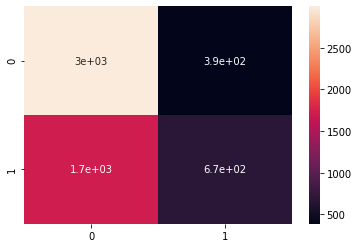

<Figure size 3600x3600 with 0 Axes>

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

pred = model.predict(test_datagen)
predictions=pred>0.81
show = sns.heatmap(confusion_matrix(test_datagen.classes,predictions), annot=True)
plt.figure(figsize=(50,50))

In [17]:
report = print(classification_report(test_datagen.classes,predictions))

              precision    recall  f1-score   support

           0       0.64      0.89      0.74      3383
           1       0.64      0.28      0.39      2393

    accuracy                           0.64      5776
   macro avg       0.64      0.58      0.56      5776
weighted avg       0.64      0.64      0.59      5776



In [18]:
confusion_matrix(test_datagen.classes,predictions)

array([[2997,  386],
       [1721,  672]], dtype=int64)

In [20]:
%pwd

'D:\\data_science\\cat project'

In [34]:
import numpy as np

my_image = 'testing photos/close-up.jpg'
from tensorflow.keras.preprocessing import image
my_image = image.load_img(my_image, target_size=(100,100), color_mode='grayscale')
my_image_arr = image.img_to_array(my_image)
my_image_arr = np.expand_dims(my_image_arr, axis=0)

print(model.predict(my_image_arr))

[[1.]]


In [23]:
train_datagen.class_indices

{'CATS': 0, 'NON-CATS': 1}

In [26]:
model.predict(my_image_arr)

array([[1.]], dtype=float32)

In [35]:
pred

array([[0.6872882 ],
       [0.8124067 ],
       [0.373829  ],
       ...,
       [0.6685535 ],
       [0.87452936],
       [0.5811402 ]], dtype=float32)

In [17]:
import sklearn 
from sklearn.metrics import accuracy_score
print(sklearn.metrics.accuracy_score(test_datagen.classes,predictions))

0.5129847645429363


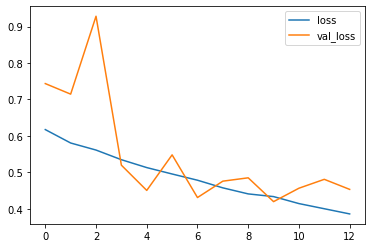

In [21]:
import pandas as pd
losses = losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [5]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [9]:
import sys 
print (sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
